In [ ]:
# 시작 전에 GPU로 바꿔주자

In [ ]:
# ImageDataGenerator에 대해서 알아보자

from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

train_dir = '/content/drive/MyDrive/KOSA3/data/cat_dog_small/train'
validation_dir = '/content/drive/MyDrive/KOSA3/data/cat_dog_small/validation'

In [ ]:
# ImageDataGenerator 생성(객체 생성)

train_datagen = ImageDataGenerator(rescale=1/255) # 0 or 1의 값이 나올 수 있도록 255로 나누어 준다
validation_datagen=ImageDataGenerator(rescale=1/255)


# ImageDataGenerator 객체 세부 설정 ( 넌 이렇게 동작해야해! 라고 세부 세팅을 해준다)
# train_datagen.flow_from_directory() # 폴더로부터 데이터를 받아들인다
train_generator = train_datagen.flow_from_directory( # 즉, 특정 폴더로부터 generator을 뽑아내는 객체를 하나 만든다
    train_dir, # target directory
    classes=['cats', 'dogs'], # train 안에 있는 폴더를 내가 원하는 순서대로 준다 (cats -> dogs)
                              # label(target) 지정, list의 순서대로 지정하기!
                              # 만약 생략되면 폴더 순서는 오름차순으로 지정된다.
    target_size=(150, 150), #image resize
    batch_size=20, # 한번에 20개의 이미지를 가져온다
                    # label에 상관없이 이미지를 가져온다
    class_mode='binary' # 이진분류이기 떄문에 binary
                        # 만약, 다중분류이면 categorical
)

validation_generator = validation_datagen.flow_from_directory( # 즉, 특정 폴더로부터 generator을 뽑아내는 객체를 하나 만든다
    validation_dir,
    classes=['cats', 'dogs'],
    target_size=(150, 150), # 평가 데이터이기 떄문에 size를 똑같이 가져와야 한다
    batch_size=20,
    class_mode='binary'
)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


x_data의 shape :  (20, 150, 150, 3)
t_data의 shape :  (20,)


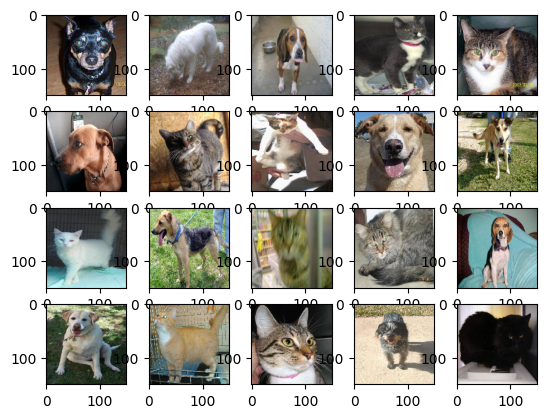

In [ ]:
# x_data, t_data  만들기

for x_data, t_data in train_generator:
    # 중간중간에 print로 제대로 가져왔는지 확인할 필요가 있음
    print('x_data의 shape : ', x_data.shape) # (20,150,150,3)
    print('t_data의 shape : ', t_data.shape) # (20, )
    break

fig = plt.figure()
axs = []   # subplot에 대한 list (20개의 subplot을 저장하려는 용도)

for i in range(20):
    axs.append(fig.add_subplot(4,5,i+1))

for x_data, t_data in train_generator:
    # x_data => (20,150,150,3)
    for idx, img_data in enumerate(x_data):
        axs[idx].imshow(img_data)
    break

In [ ]:
# 위 과정으로 ImageDataGenerator는 저렇게 사용법을 익혔다
# 이제 CNN모델을 만들고 ImageDataGenerator를 이용해서 학습을 진행해 보아요!

# 필요한 module import
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.layers import Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
# ImageDataGenerator 생성


train_dir = '/content/drive/MyDrive/KOSA3/data/cat_dog_small/train'
validation_dir = '/content/drive/MyDrive/KOSA3/data/cat_dog_small/validation'


# ImageDataGenerator를 생성(객체 생성)
train_datagen = ImageDataGenerator(rescale=1/255)
validation_datagen=ImageDataGenerator(rescale=1/255)


# ImageDataGenerator 객체 세부 설정
train_generator = train_datagen.flow_from_directory(
    train_dir,
    classes=['cats', 'dogs'],
    target_size=(150, 150),
    batch_size=20,
    class_mode='binary'
)

validation_generator = validation_datagen.flow_from_directory(
    validation_dir,
    classes=['cats', 'dogs'],
    target_size=(150, 150),
    batch_size=20,
    class_mode='binary'
)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [10]:
# Model 구현
# 필터의 개수는 앞쪽에서 뒤쪽으로 갈 수록 많아지는 것이 좋다
# 필터의 크기(kernel_size)는 3x3 을 보통 쓴다

model = Sequential()

model.add(Conv2D(filters=32,
                 kernel_size=(3,3),
                 strides=(1,1),
                 activation='relu',
                 input_shape=(150,150,3)))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(filters=64,
                 kernel_size=(3,3),
                 strides=(1,1),
                 activation='relu'))  # 여기서는 input_shape을 빼주어야한다
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(filters=128,
                 kernel_size=(3,3),
                 strides=(1,1),
                 activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(filters=256,
                 kernel_size=(3,3),
                 strides=(1,1),
                 activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

# model.summary() # 중간에 확인해주고 넘어가기

model.add(Flatten())
model.add(Dropout(rate=0.5))
model.add(Dense(units=256,
                activation='relu'))
model.add(Dense(units=1,
                activation='sigmoid'))

model.summary()


# Total params: 3600193 (13.73 MB)
# Trainable params: 3600193 (13.73 MB) -> 학습이 가능한, 값이 바뀌는 파라미터

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 74, 74, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 36, 36, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_6 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 17, 17, 128)      

In [11]:
# model 학습 설정


model.compile(optimizer=Adam(learning_rate=1e-4),
              loss='binary_crossentropy',
              metrics=['accuracy'])


# model checkpoint 확인
model_cp = ModelCheckpoint(filepath='cat_dog_checkpoint.ckpt', # 임시로 제공 받은 runtime disk에 파일이 만들어진다. 계산된 가중치를 저장해놓자
                           save_weights_only=True,
                           save_best_only=True,
                           monitor='val_loss',
                           verbose=1)

# model earlystopping 확인(조기 종료는 언제할까요?)
model_es = EarlyStopping(monitor='val_loss',
                         patience=5,
                         verbose=1,
                         restore_best_weights=True)



history = model.fit(train_generator,
                    steps_per_epoch=100,  # 1 epoch 당 몇 번 수행할지 정해주어야 한다
                    epochs=100,
                    verbose=1,
                    #validation_split=0,.3 이라고 썼었는데, 이제 validation_data가 따로 있기 때문에
                    validation_data=validation_generator,
                    validation_steps=50, # 계산해서 넣어주어야 한다
                                         # 즉, 1000개의 데이터가 20번씩 generator에서 생성되기 때문에 1000/20=50
                    callbacks=[model_cp, model_es])


model.save('./cat_dog_small_cnn_model.h5') # 학습이 끝나면, 우리 모델에 대해서 한 번에 딱 저장
# 저장하는 방법 2가지
# 1. checkpoint와 callback을 이용해서 epoch마다 저장해준다
# 2. 모델에 있어서 한 번에 저장



# 위 처럼 만들고 model 학습 진행 (shift+enter)

Epoch 1/100
100/100 [==============================] - ETA: 0s - loss: 0.6927 - accuracy: 0.5285
Epoch 1: val_loss improved from inf to 0.68840, saving model to cat_dog_checkpoint.ckpt
100/100 [==============================] - 1282s 13s/step - loss: 0.6927 - accuracy: 0.5285 - val_loss: 0.6884 - val_accuracy: 0.5000
Epoch 2/100
100/100 [==============================] - ETA: 0s - loss: 0.6809 - accuracy: 0.5640
Epoch 2: val_loss improved from 0.68840 to 0.66110, saving model to cat_dog_checkpoint.ckpt
100/100 [==============================] - 13s 127ms/step - loss: 0.6809 - accuracy: 0.5640 - val_loss: 0.6611 - val_accuracy: 0.6200
Epoch 3/100
100/100 [==============================] - ETA: 0s - loss: 0.6431 - accuracy: 0.6400
Epoch 3: val_loss improved from 0.66110 to 0.63966, saving model to cat_dog_checkpoint.ckpt
100/100 [==============================] - 10s 104ms/step - loss: 0.6431 - accuracy: 0.6400 - val_loss: 0.6397 - val_accuracy: 0.6200
Epoch 4/100
100/100 [==============

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


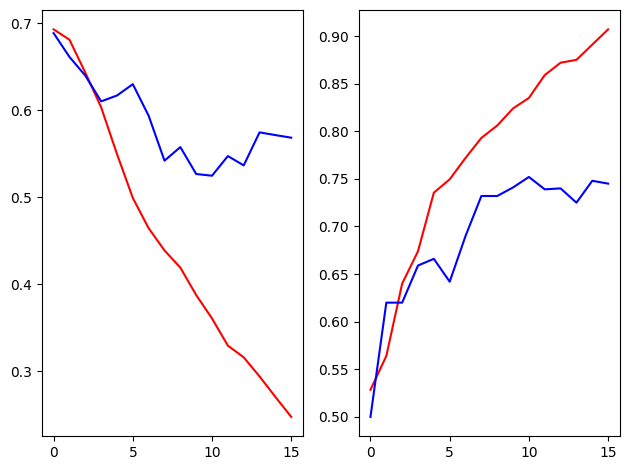

In [13]:
# 결과 그래프를 그려보아요!

fig = plt.figure()

ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)

ax1.plot(history.history['loss'], color='r')
ax1.plot(history.history['val_loss'], color='b')

ax2.plot(history.history['accuracy'], color='r')
ax2.plot(history.history['val_accuracy'], color='b')

plt.tight_layout()
plt.show()

# training data가 잘 맞춰졌으니까 좋은 결과를 나타내지만
# ax1 파란선이 중간에 상승하는 모습을 보여 overfitting이 생겼다는 것을 알 수 있다

In [14]:
# Overfitting을 줄이기 위해서는!

# 1. Feature의 개수 줄이기
# 2. 규제(L1, L2)
# 3. Dropout
# 가장 중요한 방법은!
# 4. Data가 많으면 된다
#    Image를 증식(Augmenation)을 이용해서 학습하면 되겠다!
#    but, 증식 데이터는 '코드'를 구현해야 한다.
#    이 코드는 ImageDataGenerator가 제공한다

In [15]:
# 결과를 살펴보았더니 Overfitting이 너무 심하다
# 일단 정확도도 중요하지만, 이거부터 해결해야한다!
# 우리가 가지고 있는 ImageDataGenerator을 이용한 증식기법을 통해
# overfitting을 해결해보자

from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

datagen = ImageDataGenerator(rotation_range=20, # 회전 각도를 주어서 이미지를 변형
                             width_shift_range=0.1, # 10% 정도의 비율의 범위 내에서만 이동해라
                             height_shift_range=0.1,
                             shear_range=0.1,
                             zoom_range=0.2,
                             horizontal_flip=True,
                             vertical_flip=True,
                             fill_mode='nearest' # 이미지가 생길 수 있는 빈 공간이 생기는데 그 빈공간을 'nearest'로 근처에 있는 픽셀의 값으로 채워라)
                             )

<class 'PIL.Image.Image'>
<class 'numpy.ndarray'> (150, 150, 3)
(1, 150, 150, 3)


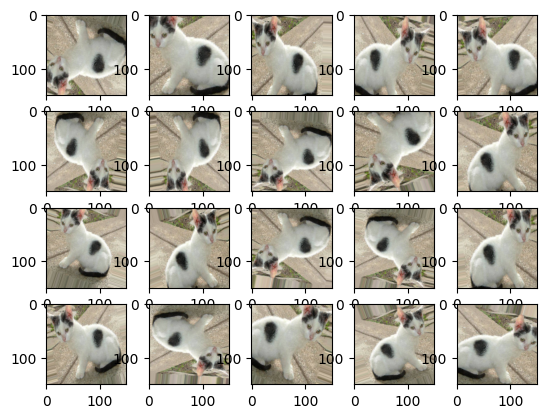

In [17]:
img = image.load_img('/content/drive/MyDrive/KOSA3/data/cat_dog_small/train/cats/cat.3.jpg',
                     target_size=(150,150))

# 원래는 numpy array가 나와야 함
# 확인
print(type(img)) # <class 'PIL.Image.Image'>

# numpy array로 바꿔줌
x = image.img_to_array(img)
print(type(x), x.shape)  # (150, 150, 3)
# 현재 이미지가 1장이다. 이 이미지에 대해서 ImageDataGenerator를 이용해서
# Augmentation(증식)된 이미지를 뽑을것이다.

# 그런데 ImageDataGenerator은 여러장의 이미지를 추출하는 거라서
# 기본적으로 4차원이 필요하다 (하지만, 현재 가지고 있는 것은 3차원이다)
x = x.reshape((1,) + x.shape) # x라는 4차원 데이터를 준비
print(x.shape)  # (1, 150, 150, 3)



# 증식된 이미지 20장을 그려보자
# 이미지의 개수를 확 늘려서(데이터의 개수를 늘려서)
# overfitting을 줄이자!

fig = plt.figure()
axs = []

for i in range(20):
    axs.append(fig.add_subplot(4,5,i+1))

idx = 0
for batch in datagen.flow(x, batch_size=1):
    axs[idx].imshow(image.array_to_img(batch[0]))
    idx += 1
    if idx % 20 == 0:
        break;

In [18]:
# 증식이 어떤건지 알아보았으니
# 위쪽에서 수행한 코드를 증식을 포함해서 다시 수정하고 다시 한 번
# 학습을 진행해보자

# 필요한 module import
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.layers import Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [19]:
# ImageDataGenerator 생성
train_dir = '/content/drive/MyDrive/KOSA3/data/cat_dog_small/train'
validation_dir = '/content/drive/MyDrive/KOSA3/data/cat_dog_small/validation'


# ImageDataGenerator를 생성(객체 생성)
train_datagen = ImageDataGenerator(rescale=1/255,
                                   rotation_range=20,
                                   width_shift_range=0.1,
                                   height_shift_range=0.1,
                                   shear_range=0.1,
                                   zoom_range=0.2,
                                   horizontal_flip=True,
                                   vertical_flip=True,
                                   fill_mode='nearest')
validation_datagen = ImageDataGenerator(rescale=1/255)


# ImageDataGenerator 객체 세부 설정
train_generator = train_datagen.flow_from_directory(
    train_dir, # target directory
    classes=['cats', 'dogs'], # label(target) 지정, list의 순서대로 지정.
                              # 만약 생략되면 폴더 순서(오름차순)로 지정되요
    target_size=(150,150), # image resize
    batch_size=20,   # 한번에 20개의 이미지를 가져와요!
                     # label에 상관없이 이미지를 가져와요!
    class_mode='binary'   # 이진분류이기 때문에 binary
                          # 만약 다중분류이면 categorical
)



validation_generator = validation_datagen.flow_from_directory(
    validation_dir,
    classes=['cats', 'dogs'],
    target_size=(150,150),
    batch_size=20,
    class_mode='binary'
)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [20]:
# Model 구현
model = Sequential()

model.add(Conv2D(filters=32,
                 kernel_size=(3,3),
                 strides=(1,1),
                 activation='relu',
                 input_shape=(150,150,3)))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(filters=64,
                 kernel_size=(3,3),
                 strides=(1,1),
                 activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(filters=128,
                 kernel_size=(3,3),
                 strides=(1,1),
                 activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(filters=256,
                 kernel_size=(3,3),
                 strides=(1,1),
                 activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dropout(rate=0.5))
model.add(Dense(units=256,
                activation='relu'))
model.add(Dense(units=1,
                activation='sigmoid'))

In [21]:
# model 학습 설정하고 학습을 진행
model.compile(optimizer=Adam(learning_rate=1e-4),
              loss='binary_crossentropy',
              metrics=['accuracy'])

model_cp = ModelCheckpoint(filepath='cat_dog_checkpoint.ckpt',
                           save_weights_only=True,
                           save_best_only=True,
                           monitor='val_loss',
                           verbose=1)

model_es = EarlyStopping(monitor='val_loss',
                         patience=5,
                         verbose=1,
                         restore_best_weights=True)

history = model.fit(train_generator,
                    steps_per_epoch=100,
                    epochs=100,
                    verbose=1,
                    validation_data=validation_generator,
                    validation_steps=50,
                    callbacks=[model_cp, model_es])

model.save('./cat_dog_small_cnn_model.h5')

Epoch 1/100
100/100 [==============================] - ETA: 0s - loss: 0.6953 - accuracy: 0.4970
Epoch 1: val_loss improved from inf to 0.69820, saving model to cat_dog_checkpoint.ckpt
100/100 [==============================] - 26s 246ms/step - loss: 0.6953 - accuracy: 0.4970 - val_loss: 0.6982 - val_accuracy: 0.5000
Epoch 2/100
100/100 [==============================] - ETA: 0s - loss: 0.6894 - accuracy: 0.5225
Epoch 2: val_loss improved from 0.69820 to 0.67585, saving model to cat_dog_checkpoint.ckpt
100/100 [==============================] - 20s 203ms/step - loss: 0.6894 - accuracy: 0.5225 - val_loss: 0.6759 - val_accuracy: 0.5530
Epoch 3/100
100/100 [==============================] - ETA: 0s - loss: 0.6672 - accuracy: 0.5900
Epoch 3: val_loss improved from 0.67585 to 0.65559, saving model to cat_dog_checkpoint.ckpt
100/100 [==============================] - 23s 227ms/step - loss: 0.6672 - accuracy: 0.5900 - val_loss: 0.6556 - val_accuracy: 0.5990
Epoch 4/100
100/100 [==============

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


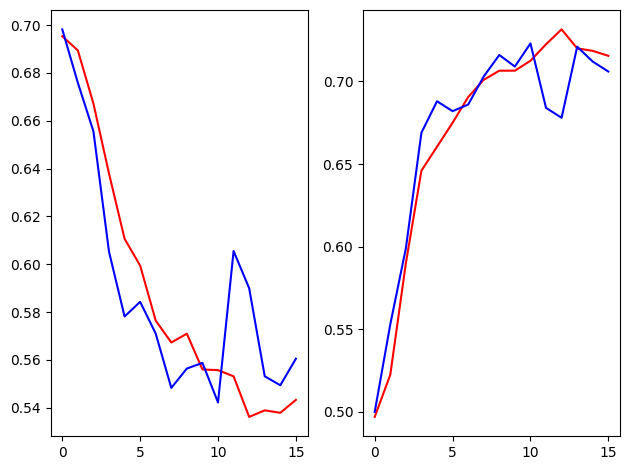

In [22]:
# 결과 그래프를 그려보아요!

fig = plt.figure()

ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)

ax1.plot(history.history['loss'], color='r')
ax1.plot(history.history['val_loss'], color='b')

ax2.plot(history.history['accuracy'], color='r')
ax2.plot(history.history['val_accuracy'], color='b')

plt.tight_layout()
plt.show()

In [2]:
# 학습 데이터가 부족 할 때 데이터의 양을 늘리기 위해 증식을 사용했는데
# overfitting을 줄였을 뿐이지
# 이 모델 자체의 accuracy는 올라가지 않았다

# Pretrained Network을 이용해 보아요!
# CNN의 이미지 특징을 추출하는 부분의 Filter를 활용해서
# 우리 모델을 완성해 볼꺼예요!

from tensorflow.keras.applications import VGG16

model_base = VGG16(weights='imagenet',
                   include_top=False,
                   input_shape=(150,150,3))

model_base.summary()

58889256/58889256 [==============================] - 1s 0us/step
Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 150, 150, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 150, 150, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 150, 150, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 75, 75, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 75, 75, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 75, 75, 128)       147584    
                                                              

In [3]:
# VGG16의 Feature Extraction부분을 가져와서
# ImageDataGenerator와 연동시켜
# 우리가 가지고 있는 개와 고양이 이미지의 특성을 추출해보아요!

# 필요한 module import
import numpy as np
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [4]:
train_dir = '/content/drive/MyDrive/KOSA3/data/cat_dog_small/train'
validation_dir = '/content/drive/MyDrive/KOSA3/data/cat_dog_small/validation'

In [6]:
datagen = ImageDataGenerator(rescale=1/255)
batch_size = 20

def extract_feature(directory, sample_count):

    features = np.zeros(shape=(sample_count, 4, 4, 512))  # 원하는 쉐입에 모두 0으로 채운 numpy array가 features 안으로 들어간다
    labels = np.zeros(shape=(sample_count,))

    generator = datagen.flow_from_directory(
        directory,
        classes=['cats', 'dogs'],
        target_size=(150,150),
        batch_size=batch_size,
        class_mode='binary'
    )


    i=0

    for x_data_batch, t_data_batch in generator:
        feature_batch = model_base.predict(x_data_batch)
        features[i*batch_size:(i+1)*batch_size] = feature_batch
        labels[i*batch_size:(i+1)*batch_size] = t_data_batch

        i += 1
        if i * batch_size >= sample_count:
            break

    return features, labels


train_features, train_labels = extract_feature(train_dir, 2000)

Found 2000 images belonging to 2 classes.
1/1 [==============================] - 0s 30ms/step


In [7]:
validation_features, validation_labels = extract_feature(validation_dir, 1000)

Found 1000 images belonging to 2 classes.
1/1 [==============================] - 0s 20ms/step


In [10]:
# 이렇게 만든 특성데이터를 이옹해서 학습을 진행하면 된다
# classifier를 구현하면 된다
# DNN 구현하자

# 한 번 해보자!
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.optimizers import Adam

model = Sequential()
model.add(Dense(units=256,
                activation='relu',
                input_shape=(4*4*512,)))
model.add(Dropout(rate=0.5))
model.add(Dense(units=1,
                activation='sigmoid'))

model.compile(optimizer=Adam(learning_rate=1e-4),
              loss='binary_crossentropy',
              metrics=['accuracy'])

history = model.fit(train_features.reshape(2000,4*4*512),
                    train_labels.reshape(-1,1),
                    epochs=30,
                    batch_size=20,
                    validation_data=(validation_features.reshape(1000,4*4*512),
                                     validation_labels.reshape(-1,1)))

Epoch 1/30
100/100 [==============================] - 4s 8ms/step - loss: 0.4521 - accuracy: 0.7830 - val_loss: 0.3046 - val_accuracy: 0.8770
Epoch 2/30
100/100 [==============================] - 1s 5ms/step - loss: 0.2804 - accuracy: 0.8815 - val_loss: 0.2616 - val_accuracy: 0.8960
Epoch 3/30
100/100 [==============================] - 1s 6ms/step - loss: 0.2291 - accuracy: 0.9080 - val_loss: 0.2573 - val_accuracy: 0.9020
Epoch 4/30
100/100 [==============================] - 1s 6ms/step - loss: 0.1818 - accuracy: 0.9380 - val_loss: 0.2365 - val_accuracy: 0.9040
Epoch 5/30
100/100 [==============================] - 1s 6ms/step - loss: 0.1573 - accuracy: 0.9425 - val_loss: 0.2334 - val_accuracy: 0.9050
Epoch 6/30
100/100 [==============================] - 1s 5ms/step - loss: 0.1345 - accuracy: 0.9490 - val_loss: 0.2368 - val_accuracy: 0.9060
Epoch 7/30
100/100 [==============================] - 1s 6ms/step - loss: 0.1142 - accuracy: 0.9610 - val_loss: 0.2477 - val_accuracy: 0.8980
Epoch 

In [11]:
# Pretrained Network을 사용해서
# 개와 고양이 분류문제를 해결하고 있어요!
# 지금은 VGG16을 이용해서 개와 고양이 이미지의 특성을 추출해서
# 그걸 가지고 학습을 진행!
# 결론적으로 accuracy는 증가하지만 아직 overfitting은 남아있어요!
# 여기에 Augmentation을 추가해보아요!

In [12]:
# 1. 필요한 module import 하기

import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.applications import VGG16
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [13]:
# 2. 입력으로 사용할 이미지가 들어가 있는 폴더 지정

train_dir = '/content/drive/MyDrive/KOSA3/data/cat_dog_small/train'
validation_dir = '/content/drive/MyDrive/KOSA3/data/cat_dog_small/validation'

In [14]:
# 3. ImageDataGenerator 2가지 만들기(train용, validation용)

# 증식은 train에서만 사용해주면 된다
train_datagen = ImageDataGenerator(rescale=1/255,
                                   rotation_range=20,
                                   width_shift_range=0.1,
                                   height_shift_range=0.1,
                                   shear_range=0.1,
                                   zoom_range=0.2,
                                   horizontal_flip=True,
                                   vertical_flip=True,
                                   fill_mode='nearest')

validation_datagen = ImageDataGenerator(rescale=1/255)

In [15]:
# 3-1. ImageDataGenerator 객체 세부 설정

train_generator = train_datagen.flow_from_directory(
    train_dir, # target directory
    classes=['cats', 'dogs'], # label(target) 지정, list의 순서대로 지정.
                              # 만약 생략되면 폴더 순서(오름차순)로 지정되요
    target_size=(150,150), # image resize
    batch_size=20,   # 한번에 20개의 이미지를 가져와요!
                     # label에 상관없이 이미지를 가져와요!
    class_mode='binary'   # 이진분류이기 때문에 binary
                          # 만약 다중분류이면 categorical
)

validation_generator = validation_datagen.flow_from_directory(
    validation_dir,
    classes=['cats', 'dogs'],
    target_size=(150,150),
    batch_size=20,
    class_mode='binary'
)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [17]:
# 4. Model 구현

model_base = VGG16(weights='imagenet',
                   include_top=False,
                   input_shape=(150,150,3))
model_base.trainable = False # False 값을 주면 trainable 필터값은 변하지 않는다

model_base.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 150, 150, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 150, 150, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 150, 150, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 75, 75, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 75, 75, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 75, 75, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 37, 37, 128)       0     

In [18]:
# 위에서 만든 모델 base를 내 모델에 add로 추가해줄 때 제일 먼저 추가해준다

model = Sequential()

model.add(model_base)

model.add(Flatten(input_shape=(4*4*512,)))

model.add(Dense(units=256,
                activation='relu'))

model.add(Dropout(rate=0.5))

model.add(Dense(units=1,
                activation='sigmoid'))

model.compile(optimizer=Adam(learning_rate=1e-4),
              loss='binary_crossentropy',
              metrics=['accuracy'])

history = model.fit(train_generator,
                    steps_per_epoch=100,
                    epochs=30,
                    validation_data=validation_generator,
                    validation_steps=50,
                    verbose=1)

Epoch 1/30
100/100 [==============================] - 25s 233ms/step - loss: 0.6177 - accuracy: 0.6675 - val_loss: 0.3757 - val_accuracy: 0.8420
Epoch 2/30
100/100 [==============================] - 23s 235ms/step - loss: 0.4812 - accuracy: 0.7655 - val_loss: 0.3424 - val_accuracy: 0.8500
Epoch 3/30
100/100 [==============================] - 23s 233ms/step - loss: 0.4441 - accuracy: 0.8020 - val_loss: 0.3119 - val_accuracy: 0.8560
Epoch 4/30
100/100 [==============================] - 24s 236ms/step - loss: 0.4272 - accuracy: 0.8040 - val_loss: 0.2944 - val_accuracy: 0.8630
Epoch 5/30
100/100 [==============================] - 22s 216ms/step - loss: 0.4119 - accuracy: 0.8075 - val_loss: 0.2971 - val_accuracy: 0.8710
Epoch 6/30
100/100 [==============================] - 23s 232ms/step - loss: 0.3954 - accuracy: 0.8165 - val_loss: 0.2827 - val_accuracy: 0.8730
Epoch 7/30
100/100 [==============================] - 22s 216ms/step - loss: 0.3778 - accuracy: 0.8325 - val_loss: 0.2794 - val_ac